# Dataset exploration

In [3]:
import pandas as pd
import numpy as np
import os
import networkx as nx
import matplotlib.pyplot as plt
from tqdm import tqdm
from properties import DATA_DIR

### Textual descriptions

In [28]:
# Load train and val datasets
train_data = pd.read_csv(DATA_DIR/"train.tsv", delimiter="\t", header=None)
val_data = pd.read_csv(DATA_DIR/"val.tsv", delimiter="\t", header=None)

# Display the first few rows of each dataset



def find_description(id_to_find:int, df: pd.DataFrame=train_data) -> str:
    description = df.loc[df[0] == id_to_find, 1].iloc[0]
    return description
print("Train Dataset:")
train_data.head()

Train Dataset:


,0,1
0,25244316,UDP-alpha-D-galactofuranose(2-) is a UDP-D-gal...
1,46931111,2-acetamido-2-deoxy-3-O-(4-deoxy-alpha-L-threo...
2,743,"Glutaric acid is an alpha,omega-dicarboxylic a..."
3,6151363,All-trans-4-oxoretinal is a retinoid that is a...
4,7344,Ethyl 2-hydroxypropanoate is the ethyl ester o...


In [76]:
print(len(train_data))
print(len(val_data[1]))

26408
3301


In [5]:
print("\nValidation Dataset:")
val_data.head()



Validation Dataset:


,0,1
0,688461,(S)-etodolac is the S-enantiomer of etodolac. ...
1,44456859,Alpha-Neup5Ac-(2->3)-beta-D-Galp-(1->4)-[alpha...
2,100067,"Syringaresinol is a lignan that is 7,9':7',9-d..."
3,12512,Tert-butyl ethyl ether is an ether having ethy...
4,11601663,Phoyunbene D is a stilbenoid that is trans-sti...


## Graph dataset statistics

In [6]:
# Load the token embedding dictionary
token_embedding_dict = np.load(DATA_DIR/"token_embedding_dict.npy", allow_pickle=True)[()]

print('Length of the token embedding dict',len(token_embedding_dict))

# Display a few entries from the dictionary
for idx, (token, embedding) in enumerate(token_embedding_dict.items()):
    if idx < 20:  # Display only the first 5 entries for brevity
        print(f"Token: {token}, Embedding shape: {embedding.shape}")
    else:
        break


Length of the token embedding dict 3138
Token: UNK, Embedding shape: (300,)
Token: 847680145, Embedding shape: (300,)
Token: 3855292234, Embedding shape: (300,)
Token: 3753451792, Embedding shape: (300,)
Token: 864666390, Embedding shape: (300,)
Token: 3925650716, Embedding shape: (300,)
Token: 3737048253, Embedding shape: (300,)
Token: 3892129619, Embedding shape: (300,)
Token: 3466667646, Embedding shape: (300,)
Token: 4237357508, Embedding shape: (300,)
Token: 2246728737, Embedding shape: (300,)
Token: 3975275337, Embedding shape: (300,)
Token: 864674487, Embedding shape: (300,)
Token: 2076190208, Embedding shape: (300,)
Token: 3217380708, Embedding shape: (300,)
Token: 1135286194, Embedding shape: (300,)
Token: 3218693969, Embedding shape: (300,)
Token: 994485099, Embedding shape: (300,)
Token: 2353112200, Embedding shape: (300,)
Token: 951226070, Embedding shape: (300,)


In [7]:
# Define the path to the raw data folder
raw_data_folder = DATA_DIR/"raw"

In [8]:
# Read and print the content of 1.graph
graph_file_path = '__data/raw/1.graph'

with open(graph_file_path, 'r') as file:
    graph_content = file.read()

print("Content of 1.graph:")
print(graph_content)

Content of 1.graph:
edgelist:
0 1
1 0
1 2
2 1
1 3
3 1
3 4
4 3
4 5
5 4
5 6
6 5
6 7
7 6
6 8
8 6
4 9
9 4
9 10
10 9
10 11
11 10
10 12
12 10
10 13
13 10

idx to identifier:
0 3545365497
1 2664995851
2 1510328189
3 2807496773
4 3927890045
5 1506993418
6 2720617233
7 1510328189
8 1510323402
9 564016084
10 2455552319
11 3824347764
12 3824347764
13 3824347764



In [9]:
# Load the edgelist and idx to identifier mapping

with open(graph_file_path, "r") as file:
    lines = file.readlines()

# Extract edgelist
edgelist_start = lines.index("edgelist:\n") + 1
edgelist_end = lines.index("idx to identifier:\n")
edgelist_lines = lines[edgelist_start:edgelist_end]
edgelist = [tuple(map(int, line.split())) for line in edgelist_lines if line.strip()]  # Exclude empty lines

# Extract idx to identifier mapping
idx_to_identifier_lines = lines[edgelist_end + 1:]
idx_to_identifier = {int(line.split()[0]): int(line.split()[1]) for line in idx_to_identifier_lines if line.strip()}

# Now you have the edgelist and the mapping between node indices and token identifiers for each graph
print(f"Graph 1 path: {graph_file_path}")
print("Edgelist:", edgelist)
print("Idx to Identifier Mapping:", idx_to_identifier)
print("\n")


Graph 1 path: __data/raw/1.graph
Edgelist: [(0, 1), (1, 0), (1, 2), (2, 1), (1, 3), (3, 1), (3, 4), (4, 3), (4, 5), (5, 4), (5, 6), (6, 5), (6, 7), (7, 6), (6, 8), (8, 6), (4, 9), (9, 4), (9, 10), (10, 9), (10, 11), (11, 10), (10, 12), (12, 10), (10, 13), (13, 10)]
Idx to Identifier Mapping: {0: 3545365497, 1: 2664995851, 2: 1510328189, 3: 2807496773, 4: 3927890045, 5: 1506993418, 6: 2720617233, 7: 1510328189, 8: 1510323402, 9: 564016084, 10: 2455552319, 11: 3824347764, 12: 3824347764, 13: 3824347764}




Graph 22772 path: /Data/code/molecule-retrieval-using-nlp/__data/raw/22772.graph
Edgelist: [(0, 1), (1, 0), (1, 2), (2, 1), (2, 3), (3, 2), (3, 4), (4, 3), (4, 5), (5, 4), (5, 6), (6, 5)]
Idx to Identifier Mapping: {0: 2551483158, 1: 700116948, 2: 228910103, 3: 2918505930, 4: 228910103, 5: 700116948, 6: 2551483158}




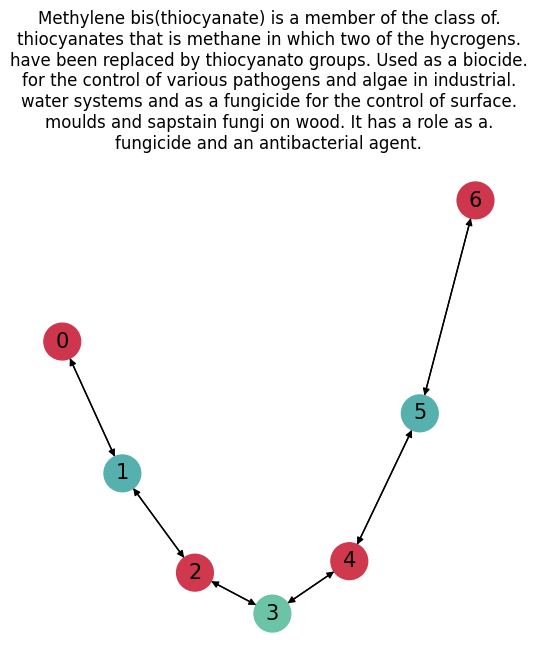

<Figure size 640x480 with 0 Axes>

In [70]:
def split_description(desc, max_length=60):
    """
    Splits a description into lines, each of maximum length, without breaking words.
    
    Parameters:
    - desc: The input text to be split.
    - max_length: The maximum length of each line.
    
    Returns:
    - A string with the input text split into lines, each of maximum length.
    """
    words = desc.split()
    lines = []
    current_line = ""
    
    for word in words:
        # Check if adding the next word would exceed the max length
        if len(current_line) + len(word) + 1 > max_length:
            # If the current line is not empty, add it to the lines list
            if current_line:
                lines.append(current_line)
                current_line = word  # Start a new line with the current word
            else:
                # If the current line is empty (a very long word), add the word directly
                lines.append(word)
        else:
            # If the line would not exceed the max length, add the word to the current line
            if current_line:
                # Add a space before the word if the line is not empty
                current_line += " " + word
            else:
                current_line = word
    
    # Add the last line if it's not empty
    if current_line:
        lines.append(current_line)
    
    # Join the lines with a newline character
    return '.\n'.join(lines)

# Load the edgelist and idx to identifier mapping
def plot_molecule(graph_id=1):
    graph_file_path = DATA_DIR/"raw"/f'{graph_id}.graph'
    with open(graph_file_path, "r") as file:
        lines = file.readlines()

    # Extract edgelist
    edgelist_start = lines.index("edgelist:\n") + 1
    edgelist_end = lines.index("idx to identifier:\n")
    edgelist_lines = lines[edgelist_start:edgelist_end]
    edgelist = [tuple(map(int, line.split())) for line in edgelist_lines if line.strip()]  # Exclude empty lines

    # Extract idx to identifier mapping
    idx_to_identifier_lines = lines[edgelist_end + 1:]
    idx_to_identifier = {int(line.split()[0]): int(line.split()[1]) for line in idx_to_identifier_lines if line.strip()}

    # Now you have the edgelist and the mapping between node indices and token identifiers for each graph
    print(f"Graph {graph_id} path: {graph_file_path}")
    print("Edgelist:", edgelist)
    print("Idx to Identifier Mapping:", idx_to_identifier)
    print("\n")


    # Create a directed graph from the edgelist
    G = nx.DiGraph()
    G.add_edges_from(edgelist)

    # Function to generate a color for each identifier
    def get_color(identifier, colormap=plt.cm.Spectral):
        # Normalize the identifier value to a range within the colormap
        normalized_value = hash(identifier) % 256 / 256
        return colormap(normalized_value)

    # Assign a color to each node based on its identifier
    node_colors = [get_color(idx_to_identifier[node]) for node in G.nodes()]

    # Draw the graph
    # plt.figure(figsize=(12, 8))  # Set the figure size
    plt.figure(figsize=(5, 5))  # Set the figure size
    pos = nx.spring_layout(G)  # Positions for all nodes
    
    nx.draw(G, pos, with_labels=True, node_color=node_colors, node_size=700, 
            edge_color='k', linewidths=1, font_size=15, arrows=True)
    desc = find_description(graph_id)
    desc = '.\n'.join(desc.split("."))
    desc = split_description(desc)
    plt.title(f"{desc}")
    plt.show()
    plt.clf()
plot_molecule(22772)

In [45]:
def find_keyword_descriptions(df, keyword="water") -> pd.DataFrame:
    """
    Searches for rows in the DataFrame where the description contains the keywor like "water".
    
    Parameters:
    - df: A pandas DataFrame with column `0` as IDs and column `1` as descriptions.
    
    Returns:
    - A DataFrame with rows where the description contains the keyword "water".
    """
    # Filter the DataFrame for descriptions containing the word "water"
    # The search is case-insensitive
    water_rows = df[df[1].str.contains(keyword.lower(), case=False, na=False)]
    return water_rows

selection = find_keyword_descriptions(train_data, keyword="water")
selection
# find_keyword_descriptions(train_data, keyword="H2O")
# find_keyword_descriptions(train_data, keyword="nitrogen")

,0,1
1045,40634,Trolox is a chromanol that is 6-hydroxychroman...
1180,22772,Methylene bis(thiocyanate) is a member of the ...
1573,23667548,Sodium ascorbate is an organic sodium salt res...
2002,10198436,Tin(II) chloride dihydrate is a hydrate that i...
2082,105142,((18)O)water is a form of water consisting of ...
...,...,...
24662,400452,Bromodeoxytopsentin is an aromatic ketone that...
24802,542762,Bromochloroacetic acid is a monocarboxylic aci...
25195,16211218,Cadmium sulfate hydrate is a hydrate composed ...
25553,12771,"2,6-dichlorobenzoquinone is a member of the cl..."


Graph 22772 path: /Data/code/molecule-retrieval-using-nlp/__data/raw/22772.graph
Edgelist: [(0, 1), (1, 0), (1, 2), (2, 1), (2, 3), (3, 2), (3, 4), (4, 3), (4, 5), (5, 4), (5, 6), (6, 5)]
Idx to Identifier Mapping: {0: 2551483158, 1: 700116948, 2: 228910103, 3: 2918505930, 4: 228910103, 5: 700116948, 6: 2551483158}




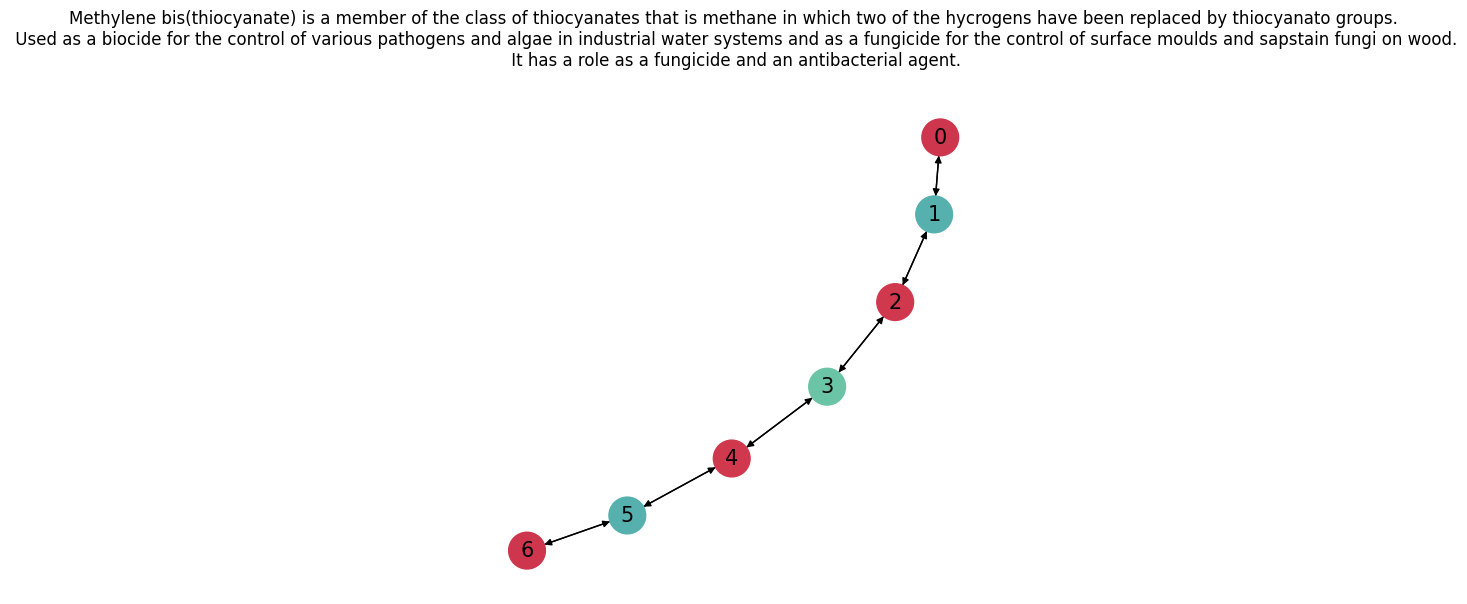

<Figure size 640x480 with 0 Axes>

In [59]:
plot_molecule(22772)
# See for instance
# https://pubchem.ncbi.nlm.nih.gov/compound/Methylene-dithiocyanate

Graph 23667548 path: /Data/code/molecule-retrieval-using-nlp/__data/raw/23667548.graph
Edgelist: [(0, 1), (1, 0), (1, 2), (2, 1), (2, 3), (3, 2), (3, 4), (4, 3), (4, 5), (5, 4), (4, 6), (6, 4), (6, 7), (7, 6), (3, 8), (8, 3), (8, 9), (9, 8), (8, 10), (10, 8), (10, 11), (11, 10), (10, 1), (1, 10)]
Idx to Identifier Mapping: {0: 10565946, 1: 3921298496, 2: 2697642734, 3: 251572710, 4: 3081284555, 5: 1542633699, 6: 4022716898, 7: 1535166686, 8: 717846610, 9: 10561807, 10: 3025587565, 11: 26234434, 12: 3737048253}




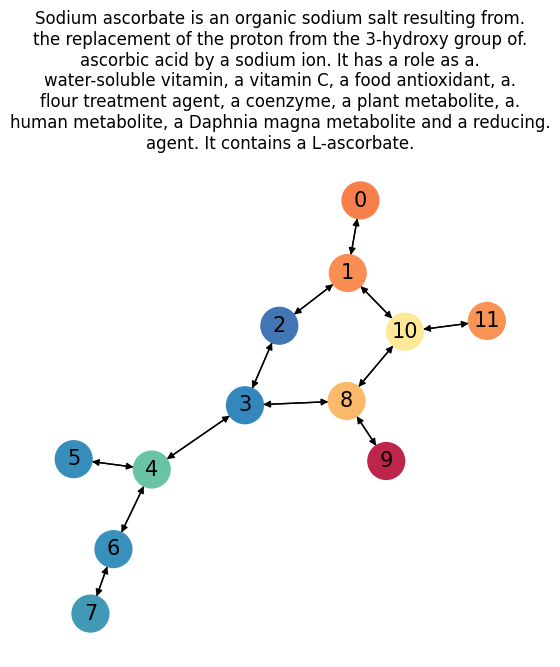

<Figure size 640x480 with 0 Axes>

In [72]:
plot_molecule(23667548)
# https://pubchem.ncbi.nlm.nih.gov/compound/23667548#section=2D-Structure

In [ ]:
for idx in selection[0]:
    plot_molecule(idx)

In [22]:
# List all the cid.graph files in the folder
graph_files = [f for f in os.listdir(raw_data_folder) if f.endswith(".graph")]

# Loop through each graph file
for idx,graph_file in enumerate(graph_files):
    if idx<10:
        graph_path = os.path.join(raw_data_folder, graph_file)

        # Load the edgelist and idx to identifier mapping
        with open(graph_path, "r") as file:
            lines = file.readlines()

        # Extract edgelist
        edgelist_start = lines.index("edgelist:\n") + 1
        edgelist_end = lines.index("idx to identifier:\n")
        edgelist_lines = lines[edgelist_start:edgelist_end]
        edgelist = [tuple(map(int, line.split())) for line in edgelist_lines]

        # Extract idx to identifier mapping
        idx_to_identifier_lines = lines[edgelist_end + 1:]
        idx_to_identifier = {int(line.split()[0]): int(line.split()[1]) for line in idx_to_identifier_lines}

        # Now you have the edgelist and the mapping between node indices and token identifiers for each graph
        print(f"Graph: {graph_file}")
        print("Edgelist:", edgelist)
        print("Idx to Identifier Mapping:", idx_to_identifier)
        print("\n")
    else:
        break


Graph: 5353.graph
Edgelist: [(0, 1), (1, 0), (1, 2), (2, 1), (2, 3), (3, 2), (3, 4), (4, 3), (4, 5), (5, 4), (5, 6), (6, 5), (5, 7), (7, 5), (4, 8), (8, 4), (8, 9), (9, 8), (9, 10), (10, 9), (10, 11), (11, 10), (11, 12), (12, 11), (12, 13), (13, 12), (13, 14), (14, 13), (14, 15), (15, 14), (15, 16), (16, 15), (16, 17), (17, 16), (17, 18), (18, 17), (18, 19), (19, 18), (10, 2), (2, 10), (19, 11), (11, 19), (18, 13), (13, 18), ()]
Idx to Identifier Mapping: {0: 3975275337, 1: 2076190208, 2: 1135286194, 3: 994485099, 4: 716189338, 5: 822222489, 6: 3840182861, 7: 2228262129, 8: 951226070, 9: 951226070, 10: 3982076256, 11: 3273018953, 12: 1101907775, 13: 1932106328, 14: 1100037548, 15: 3776905034, 16: 98513984, 17: 951226070, 18: 2720313463, 19: 2296565457}


Graph: 7866.graph
Edgelist: [(0, 1), (1, 0), (1, 2), (2, 1), (1, 3), (3, 1), (1, 4), (4, 1), (4, 5), (5, 4), (5, 6), (6, 5), ()]
Idx to Identifier Mapping: {0: 2228063684, 1: 2517511241, 2: 2228063684, 3: 2184651344, 4: 1789200865, 5: 

In [10]:
def process_graph_files(raw_data_folder, max_files=1000000):
    # List all the cid.graph files in the folder
    graph_files = [f for f in os.listdir(raw_data_folder) if f.endswith(".graph")]

    # Initialize variables to store overall statistics
    total_nodes = 0
    total_edges = 0

    # Initialize a DataFrame to store statistics
    columns = ['graph_file', 'num_nodes', 'num_edges']
    df_graph_statistics = pd.DataFrame(columns=columns)

    # Loop through each graph file
    for idx, graph_file in tqdm(enumerate(graph_files)):
        if idx < max_files:
            graph_path = os.path.join(raw_data_folder, graph_file)

            # Load the edgelist
            with open(graph_path, "r") as file:
                lines = file.readlines()

            # Extract edgelist statistics
            edgelist_start = lines.index("edgelist:\n") + 1
            edgelist_end = lines.index("idx to identifier:\n")
            edgelist_lines = lines[edgelist_start:edgelist_end-1]

            num_edges = len(edgelist_lines) // 2
            if num_edges % 1 != 0:
                print('Odd number of edges, leaving loop')
                break

            max_node = max(int(line.split()[0]) for line in edgelist_lines + ['0 0'])

            # Update statistics
            num_nodes = max_node + 1  # Assuming nodes are indexed from 0

            total_nodes += num_nodes
            total_edges += num_edges

            # Append statistics to the DataFrame using Pandas
            df_graph_statistics = pd.concat([df_graph_statistics, pd.DataFrame({
                'graph_file': [graph_file],
                'num_nodes': [num_nodes],
                'num_edges': [num_edges]
            })], ignore_index=True)
        else:
            break

    return df_graph_statistics, total_nodes, total_edges


In [11]:
# Check if the CSV file already exists
csv_file_name = 'df_graph_statistics.csv'
if os.path.exists(csv_file_name):
    print(f"The file '{csv_file_name}' already exists. Not running the function again.")
else:
    # Run the function
    df_graph_statistics, total_nodes, total_edges = process_graph_files(raw_data_folder)

    # Save DataFrame to a CSV file
    df_graph_statistics.to_csv(csv_file_name, index=False)
    print(f"The DataFrame has been saved to '{csv_file_name}'.")

The file 'df_graph_statistics.csv' already exists. Not running the function again.


In [12]:
df_graph_statistics = pd.read_csv(csv_file_name)

In [13]:
# Print distribution statistics
print("\nDistribution Statistics:")
print("Number of Nodes:")
node_stats = df_graph_statistics['num_nodes'].describe()
print(node_stats)
print("\nNumber of Edges:")
edge_stats = df_graph_statistics['num_edges'].describe()
print(edge_stats)


Distribution Statistics:
Number of Nodes:
count    102980.000000
mean         36.665925
std          32.595494
min           1.000000
25%          21.000000
50%          30.000000
75%          39.000000
max         574.000000
Name: num_nodes, dtype: float64

Number of Edges:
count    102980.000000
mean         38.919159
std          34.906351
min           0.000000
25%          22.000000
50%          32.000000
75%          42.000000
max         642.000000
Name: num_edges, dtype: float64


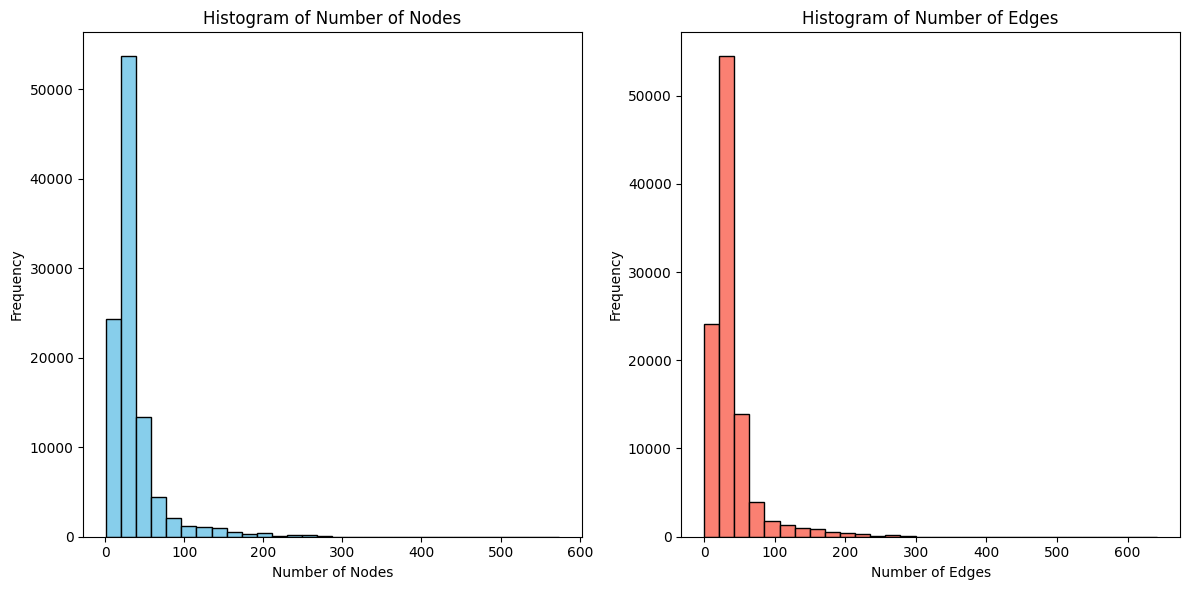

In [14]:
# Histogram plot
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(df_graph_statistics['num_nodes'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Number of Nodes')
plt.xlabel('Number of Nodes')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(df_graph_statistics['num_edges'], bins=30, color='salmon', edgecolor='black')
plt.title('Histogram of Number of Edges')
plt.xlabel('Number of Edges')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

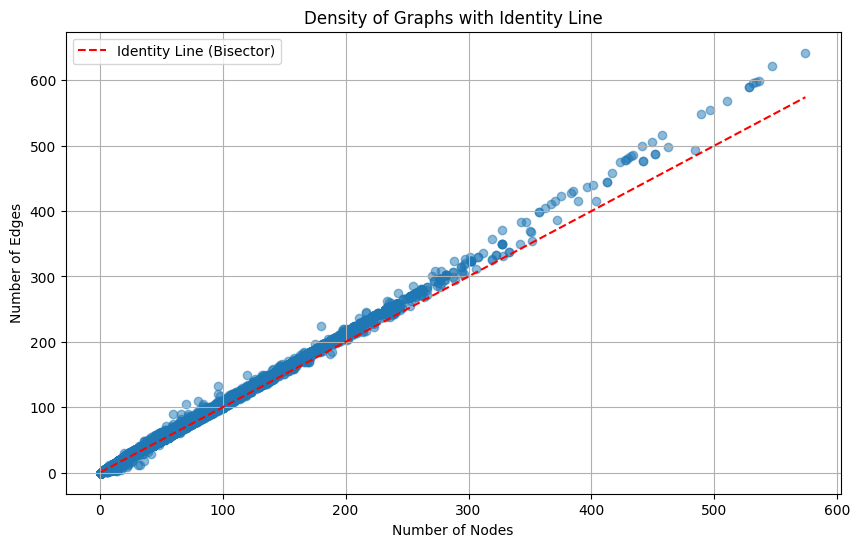

In [16]:
# Scatter plot for number of nodes vs number of edges
plt.figure(figsize=(10, 6))
plt.scatter(df_graph_statistics['num_nodes'], df_graph_statistics['num_edges'], alpha=0.5)
plt.title('Density of Graphs with Identity Line')
plt.xlabel('Number of Nodes')
plt.ylabel('Number of Edges')

# Plot the identity line (bisector)
x = np.linspace(min(df_graph_statistics['num_nodes']), max(df_graph_statistics['num_nodes']), 100)
plt.plot(x, x, color='red', linestyle='--', label='Identity Line (Bisector)')
plt.grid(True)
plt.legend()
plt.show()